# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Sadinal Mufti
- **Email:** sadinal@mhs.usk.ac.id
- **ID Dicoding:** MC322D5Y2296

## Menentukan Pertanyaan Bisnis

- Bagaimana pola jumlah penyewaan sepeda berdasarkan musim dan hari kerja (working day vs. weekend/holiday)?
- Apakah terdapat hubungan antara waktu dalam sehari (jam) dengan jumlah penyewaan sepeda? Kapan jam sibuknya?
- Apakah jumlah penyewaan sepeda lebih dipengaruhi oleh pengguna casual atau pengguna terdaftar (registered)?
- Bagaimana tren jumlah penyewaan sepeda dari tahun 2011 ke 2012? Apakah ada peningkatan atau penurunan?
- Bagaimana pengaruh faktor cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda per jam dan per hari?

## Import Semua Packages/Library yang Digunakan

In [47]:
# Import library utama untuk analisis data
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik

# Import library untuk visualisasi data
import matplotlib.pyplot as plt  # Visualisasi dasar
import seaborn as sns  # Visualisasi lanjutan

# Import library untuk analisis statistik
from scipy import stats
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

Membaca kedua dataset csv bike sharing yaitu day.csv dan hour.csv yang ada dalam folder data

In [48]:
# Membaca dataset
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

# Menampilkan 5 data pertama
print("Dataset Harian (day.csv):")
display(df_day.head())

print("\nDataset Per Jam (hour.csv):")
display(df_hour.head())


Dataset Harian (day.csv):


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Dataset Per Jam (hour.csv):


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

Kita akan melihat ringkasan data untuk memahami strukturnya dan mencari potensi masalah seperti missing values, duplikasi, atau inkonsistensi nilai.

In [49]:
# Mengecek informasi dataset harian
print("Informasi dataset day.csv:")
df_day.info()

# Mengecek informasi dataset per jam
print("\nInformasi dataset hour.csv:")
df_hour.info()

# Mengecek apakah ada missing values
print("\nCek missing values pada dataset day.csv:")
print(df_day.isnull().sum())

print("\nCek missing values pada dataset hour.csv:")
print(df_hour.isnull().sum())

# Mengecek duplikasi data
print("\nCek duplikasi data pada day.csv:", df_day.duplicated().sum())
print("Cek duplikasi data pada hour.csv:", df_hour.duplicated().sum())


Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

Informasi dataset hour.csv:
<class 'pandas.core.frame.DataFrame'>

Output dapat menyimpulkan bahwa:
- Data sudah aman dari nilai Null
- Data sudah aman dari duplikasi

Akan tetapi ada beberapa hal yang harus diperhatikan:
- Format pada kolom dteday masih dalam bentuk object
- Kolom season, weathersit, mnth, weekday, dan hr pada data belum dalam bentuk category

### Cleaning Data

#### 1. Ubah Format Kolom dteday ke Datetime
Kolom dteday masih dalam format object (string), padahal ini adalah tanggal. Kita perlu mengubahnya menjadi datetime untuk mempermudah analisis berbasis waktu.

In [50]:
# Ubah kolom dteday ke format datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

print("Informasi dataset day.csv:")
df_day.info()

# Mengecek informasi dataset per jam
print("\nInformasi dataset hour.csv:")
df_hour.info()

Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtyp

#### 2. Memastikan Data Kategorikal Memiliki Label yang Jelas
Dalam proses ini, beberapa kolom pada dataset diubah menjadi tipe data kategori sesuai pada file readme.txt untuk mempermudah analisis dan interpretasi:

- **season**: Dikategorikan menjadi empat musim:  
  - 1: Spring  
  - 2: Summer  
  - 3: Fall  
  - 4: Winter  

- **yr**: Menunjukkan tahun dengan nilai:  
  - 0: 2011  
  - 1: 2012  

- **mnth** dan **hr**: Dikonversi menjadi kategori untuk merepresentasikan:  
  - **mnth**: Bulan dalam setahun (1-12)  
  - **hr**: Jam dalam sehari (0-23)  

- **holiday**: Menunjukkan apakah hari tersebut merupakan hari libur:  
  - 0: Bukan hari libur  
  - 1: Hari libur  

- **weekday**: Menunjukkan hari dalam seminggu:  
  - 0: Minggu  
  - 1: Senin  
  - 2: Selasa  
  - 3: Rabu  
  - 4: Kamis  
  - 5: Jumat  
  - 6: Sabtu  

- **workingday**: Menunjukkan apakah hari tersebut merupakan hari kerja:  
  - 0: Akhir pekan/libur  
  - 1: Hari kerja  

- **weathersit**: Dikategorikan menjadi empat kondisi cuaca:  
  - 1: Cerah/Few clouds/Partly cloudy  
  - 2: Mist + Cloudy/Mist + Broken clouds/Mist + Few clouds/Mist  
  - 3: Light Snow/Light Rain + Thunderstorm + Scattered clouds/Light Rain + Scattered clouds  
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist/Snow + Fog  

Konversi ini bertujuan untuk membuat data lebih terstruktur, sehingga analisis dan visualisasi dapat dilakukan dengan lebih efektif.


In [51]:
# List kategori untuk df_day
category_columns_day = ["season", "weathersit", "mnth", "weekday", "yr", "holiday", "workingday"]

# List kategori untuk df_hour
category_columns_hour = ["season", "weathersit", "mnth", "weekday", "hr", "yr", "holiday", "workingday"]

# Mengubah tipe data menjadi kategori
for col in category_columns_day:
    df_day[col] = df_day[col].astype("category")

for col in category_columns_hour:
    df_hour[col] = df_hour[col].astype("category")


In [52]:
# Mengecek tipe data pada kolom season, weathersit, mnth, weekday, dan hr setelah menjadi kategori
print("Informasi dataset day.csv:")
df_day.info()

print("\nInformasi dataset hour.csv:")
df_hour.info()

Informasi dataset day.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtyp

#### 3. Drop kolom instant 

Kolom instant hanya indeks unik dan tidak memberikan informasi yang signifikan untuk analisis, sehingga bisa dihapus.

In [53]:
# Hapus kolom instant
df_day.drop(columns=["instant"], inplace=True)
df_hour.drop(columns=["instant"], inplace=True)


## Exploratory Data Analysis (EDA)

### Explore Statistik Deskriptif

In [54]:
df_day.describe()

,dteday,temp,atemp,hum,windspeed,casual,registered,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- **Mayoritas penyewa adalah pelanggan tetap** → Rata-rata pengguna **registered (3656)** jauh lebih tinggi dibanding **casual (848)**.
- **Jumlah penyewaan harian sangat bervariasi** → Rentang **22 – 8714** dengan deviasi standar tinggi (~1937).
- **Faktor lingkungan bisa memengaruhi penyewaan**:
  - **Suhu rata-rata sedang (~0.49)**, tapi ada variasi.
  - **Kelembaban cenderung tinggi (~0.63 mean, max 0.97)**.
  - **Kecepatan angin relatif rendah (~0.19 mean, max 0.50)**.

### Explore Korelasi Antar Variable
Memilih beberapa kolom yang akan dianalisis korelasinya

In [55]:
# Kolom yang akan dianalisis korelasinya
selected_columns = ["cnt", "weekday", "workingday", "temp", "atemp", "hum", "windspeed", "casual", "registered"]

# Menghitung korelasi antara kolom yang dipilih
correlation_selected = df_day[selected_columns].corr()
print(correlation_selected)


                 cnt   weekday  workingday      temp     atemp       hum  \
cnt         1.000000  0.067443    0.061156  0.627494  0.631066 -0.100659   
weekday     0.067443  1.000000    0.035790 -0.000170 -0.007537 -0.052232   
workingday  0.061156  0.035790    1.000000  0.052660  0.052182  0.024327   
temp        0.627494 -0.000170    0.052660  1.000000  0.991702  0.126963   
atemp       0.631066 -0.007537    0.052182  0.991702  1.000000  0.139988   
hum        -0.100659 -0.052232    0.024327  0.126963  0.139988  1.000000   
windspeed  -0.234545  0.014282   -0.018796 -0.157944 -0.183643 -0.248489   
casual      0.672804  0.059923   -0.518044  0.543285  0.543864 -0.077008   
registered  0.945517  0.057367    0.303907  0.540012  0.544192 -0.091089   

            windspeed    casual  registered  
cnt         -0.234545  0.672804    0.945517  
weekday      0.014282  0.059923    0.057367  
workingday  -0.018796 -0.518044    0.303907  
temp        -0.157944  0.543285    0.540012  
atemp    

In [56]:
# Menampilkan korelasi setiap variabel terhadap 'cnt' dan mengurutkannya dari yang tertinggi ke terendah
print(df_day[selected_columns].corr()["cnt"].sort_values(ascending=False))

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
weekday       0.067443
workingday    0.061156
hum          -0.100659
windspeed    -0.234545
Name: cnt, dtype: float64


**Insight Korelasi Antar Variabel dengan `cnt`**

- **Registered memiliki korelasi tertinggi dengan cnt (0.945)** → Ini menunjukkan bahwa mayoritas penyewaan berasal dari pelanggan terdaftar.
- **Casual juga memiliki korelasi positif (0.673) dengan cnt** → Meskipun lebih kecil dari registered, pelanggan tidak terdaftar tetap berkontribusi signifikan.
- **Suhu (`temp` dan `atemp`) memiliki korelasi positif (~0.63)** → Cuaca yang lebih hangat meningkatkan jumlah penyewaan.
- **Workingday dan Weekday memiliki korelasi sangat rendah (~0.06)** → Hari kerja atau hari dalam seminggu tidak terlalu mempengaruhi jumlah penyewaan.
- **Humidity (`hum`) memiliki korelasi negatif kecil (-0.10), sedangkan Windspeed memiliki korelasi negatif lebih kuat (-0.23)** → Angin kencang lebih berdampak mengurangi penyewaan dibanding kelembaban udara.


### Pertanyaan 1: 
Bagaimana pola jumlah penyewaan sepeda berdasarkan musim dan hari kerja (working day vs. weekend/holiday)?

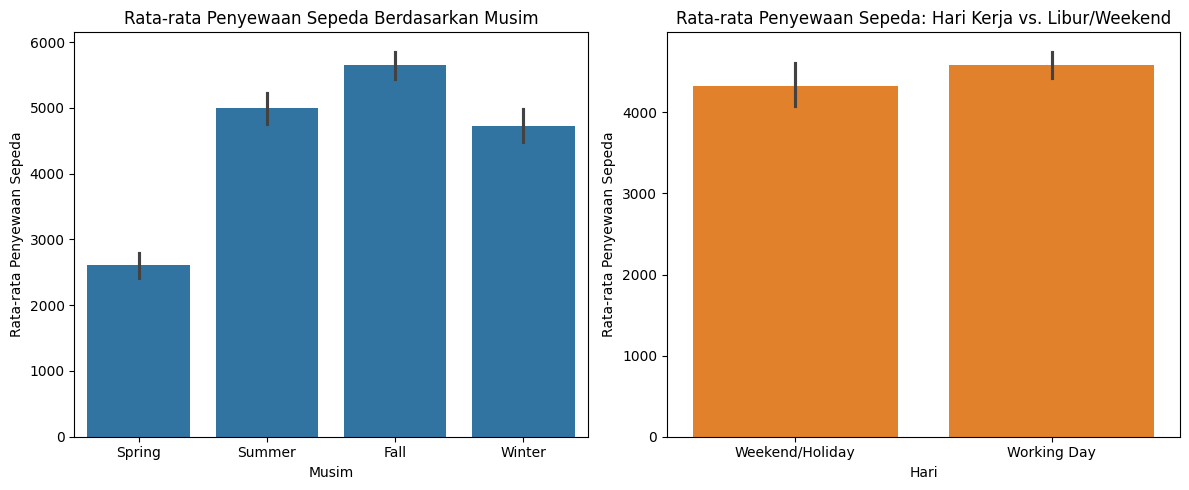

In [57]:
plt.figure(figsize=(12, 5))

# Bar chart jumlah rata-rata penyewaan berdasarkan musim
plt.subplot(1, 2, 1)
sns.barplot(x="season", y="cnt", data=df_day, estimator=np.mean, color="#1F77B4")  # Warna biru seragam
plt.xticks([0, 1, 2, 3], ["Spring", "Summer", "Fall", "Winter"])  # Label kategori musim
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")

# Bar chart jumlah rata-rata penyewaan berdasarkan hari kerja vs. libur/weekend
plt.subplot(1, 2, 2)
sns.barplot(x="workingday", y="cnt", data=df_day, estimator=np.mean, color="#FF7F0E")  # Warna oranye seragam
plt.xticks([0, 1], ["Weekend/Holiday", "Working Day"])  # Label kategori hari kerja
plt.title("Rata-rata Penyewaan Sepeda: Hari Kerja vs. Libur/Weekend")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")

plt.tight_layout()
plt.show()


**Insight dari Visualisasi Data**

**1. Rata-rata Penyewaan Sepeda Berdasarkan Musim**
- Penyewaan sepeda tertinggi terjadi pada musim gugur (fall) dengan rata-rata lebih dari 6000 penyewaan.
- Musim panas (summer) juga memiliki tingkat penyewaan tinggi, sedikit di bawah musim gugur.
- Penyewaan sepeda terendah terjadi pada musim semi (spring), dengan rata-rata di bawah 3000.
- Musim dingin (winter) memiliki tingkat penyewaan yang lebih rendah dibandingkan musim gugur dan panas, tetapi lebih tinggi dibandingkan musim semi.

**2. Rata-rata Penyewaan Sepeda: Hari Kerja vs. Libur/Weekend**
- Penyewaan sepeda pada hari kerja (working day) sedikit lebih tinggi dibandingkan hari libur atau akhir pekan (weekend/holiday).
- Perbedaan rata-rata penyewaan antara kedua kategori tidak terlalu signifikan, tetapi tetap menunjukkan kecenderungan lebih tinggi pada hari kerja.

**Kesimpulan**
- Cuaca dan musim berpengaruh signifikan terhadap penyewaan sepeda, dengan tren tertinggi pada musim gugur dan terendah pada musim semi.
- Aktivitas penyewaan sepeda cukup merata antara hari kerja dan akhir pekan, dengan sedikit kecenderungan lebih tinggi pada hari kerja.


### Pertanyaan 2
Apakah terdapat hubungan antara waktu dalam sehari (jam) dengan jumlah penyewaan sepeda? Kapan jam sibuknya?

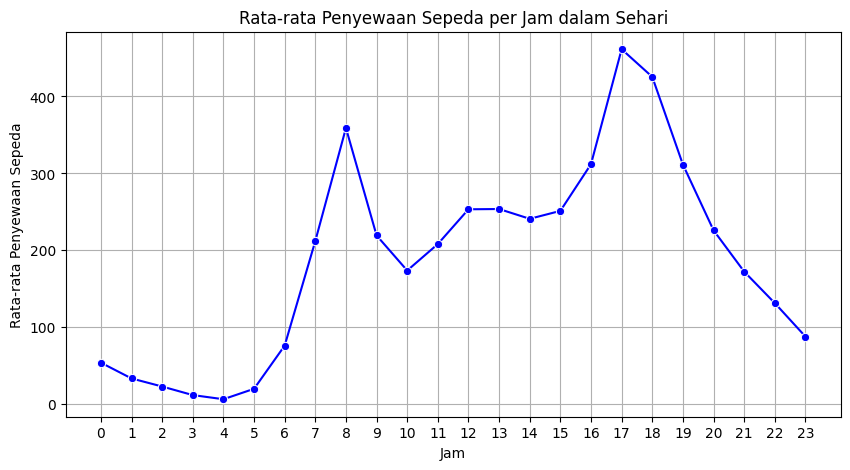

In [58]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="hr", y="cnt", data=df_hour, estimator=np.mean, errorbar=None, marker="o", color="b")
plt.xticks(range(0, 24))
plt.title("Rata-rata Penyewaan Sepeda per Jam dalam Sehari")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.grid(True)
plt.show()


**Insight: Hubungan Waktu dalam Sehari dengan Jumlah Penyewaan Sepeda**
- **Jam sibuk penyewaan terjadi pada pagi dan sore hari**   
  - Terlihat lonjakan signifikan pada pukul **07:00 - 09:00** (jam berangkat kerja/sekolah).  
  - Puncak lainnya terjadi pada **17:00 - 19:00** (jam pulang kerja/sekolah).  

- **Penyewaan sepeda paling rendah terjadi pada dini hari** (00:00 - 05:00) karena aktivitas masyarakat masih rendah.  

- **Tren ini menunjukkan bahwa banyak pengguna sepeda adalah pekerja atau pelajar** yang menggunakan sepeda sebagai moda transportasi utama di jam sibuk.   


### Pertanyaan 3 
Apakah jumlah penyewaan sepeda lebih dipengaruhi oleh pengguna casual atau pengguna terdaftar (registered)?

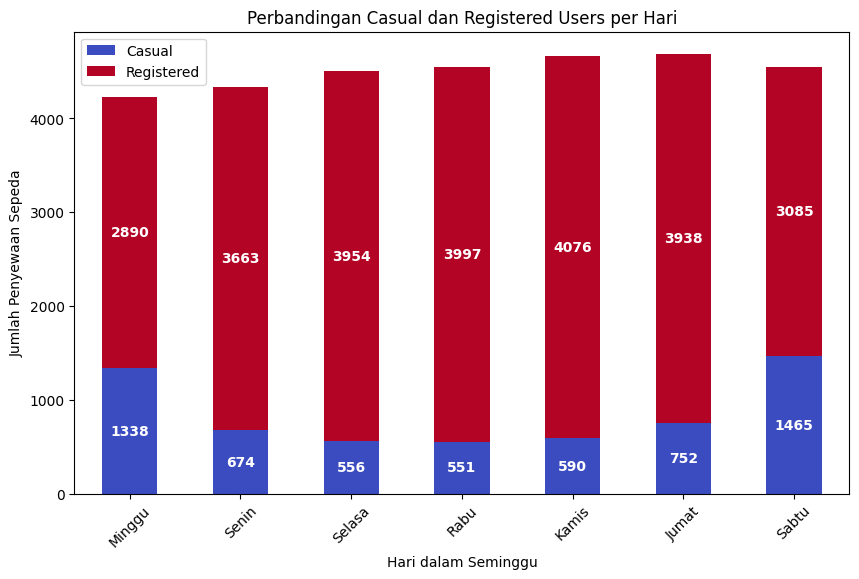

In [59]:
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung rata-rata pengguna casual & registered
df_grouped = df_day.groupby("weekday", observed=False)[["casual", "registered"]].mean().reset_index()

# Membuat mapping untuk mengganti angka weekday dengan nama hari
weekday_mapping = {
    0: "Minggu",
    1: "Senin",
    2: "Selasa",
    3: "Rabu",
    4: "Kamis",
    5: "Jumat",
    6: "Sabtu"
}

# Mengubah angka weekday menjadi nama hari (hindari masalah CategoricalDtype)
df_grouped["weekday"] = df_grouped["weekday"].astype(int).replace(weekday_mapping)

# Membuat plot
ax = df_grouped.plot(
    x="weekday",
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="coolwarm",
    title="Perbandingan Casual dan Registered Users per Hari"
)

# Menambahkan label angka pada tiap batang
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(
            f"{int(p.get_height())}",  
            (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2),  
            ha="center", va="center", fontsize=10, color="white", weight="bold"
        )

plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.xticks(rotation=45)  # Memiringkan label hari agar lebih jelas
plt.legend(["Casual", "Registered"])
plt.show()

**Insight:**
- Dari grafik, terlihat bahwa jumlah penyewaan sepeda secara keseluruhan didominasi oleh pengguna **terdaftar (registered)** dibandingkan pengguna **casual**.
- Pengguna **registered** memiliki jumlah yang jauh lebih tinggi di setiap hari dalam seminggu.
- Pengguna **casual** cenderung lebih banyak pada akhir pekan (hari Sabtu dan minggu dalam grafik), namun jumlahnya tetap lebih rendah dibandingkan pengguna **registered**.
- Pada hari kerja, pengguna **registered** tetap mendominasi, sementara pengguna **casual** menurun drastis.

**Kesimpulan:**

Jumlah penyewaan sepeda lebih dipengaruhi oleh **pengguna terdaftar (registered)** daripada pengguna casual. Hal ini menunjukkan bahwa mayoritas pengguna yang menyewa sepeda adalah pelanggan tetap yang sudah terdaftar, sementara pengguna casual cenderung lebih banyak berkontribusi pada akhir pekan. 

### Pertanyaan 4
Bagaimana tren jumlah penyewaan sepeda dari tahun 2011 ke 2012? Apakah ada peningkatan atau penurunan?

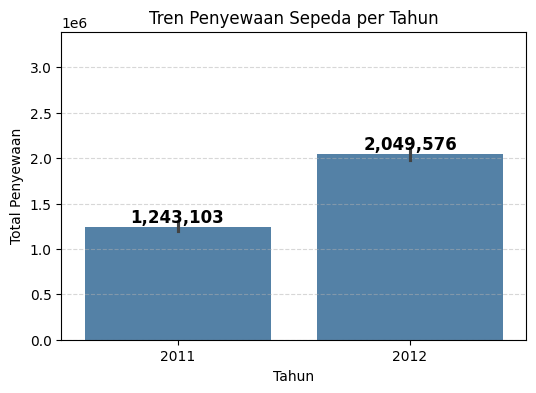

In [60]:
# Konversi 'yr' ke tahun yang lebih mudah dibaca
df_day["year"] = df_day["yr"].map({0: "2011", 1: "2012"})

# Buat visualisasi dengan satu warna
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="year", y="cnt", data=df_day, estimator=sum, color="steelblue")  # Gunakan satu warna

# Tambahkan label angka pada batang dengan posisi lebih tinggi
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", 
                (p.get_x() + p.get_width() / 2, p.get_height() + 50000),  # Naikkan posisi label
                ha="center", fontsize=12, weight="bold", color="black")

# Sesuaikan tampilan
plt.xlabel("Tahun")
plt.ylabel("Total Penyewaan")
plt.title("Tren Penyewaan Sepeda per Tahun")
plt.ylim(0, df_day["cnt"].sum() + 100000)  # Atur batas atas agar label tidak tertutup
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

**Insight**

Jumlah penyewaan sepeda meningkat dari **1,243,103 di 2011** menjadi **2,049,576 di 2012**, menunjukkan **peningkatan signifikan sekitar 64.8%**.  


### Pertanyaan 5
Bagaimana pengaruh faktor cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda per jam dan per hari?

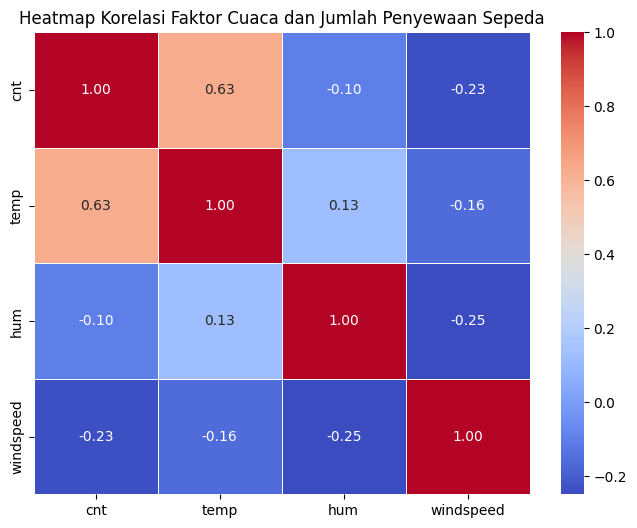

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memilih kolom yang relevan
selected_columns = ["cnt", "temp", "hum", "windspeed"]

# Menghitung korelasi
correlation_matrix = df_day[selected_columns].corr()

# Menampilkan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Faktor Cuaca dan Jumlah Penyewaan Sepeda")
plt.show()


**Insight dari Heatmap Korelasi**

- **Suhu (temp) memiliki korelasi positif cukup kuat (0.63) terhadap jumlah penyewaan sepeda**, artinya semakin hangat suhu, semakin banyak penyewaan.
- **Kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif lemah terhadap penyewaan sepeda (-0.10 dan -0.23)**, menunjukkan bahwa kelembaban tinggi dan angin kencang sedikit mengurangi jumlah penyewaan.
- Faktor yang paling berpengaruh terhadap penyewaan sepeda adalah **suhu**, sedangkan kelembaban dan kecepatan angin memiliki dampak yang lebih kecil.


## Analisis Clustering menggunakan Teknik Binning

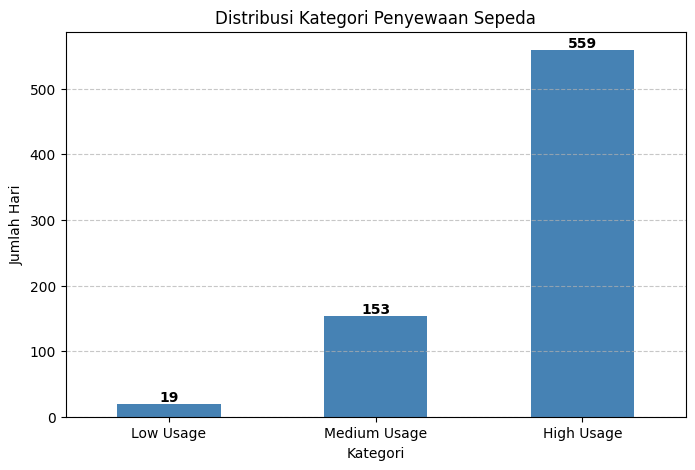

In [62]:
# Kategorisasi penyewaan sepeda
bins = [0, 1000, 3000, df_day['cnt'].max()]
labels = ['Low Usage', 'Medium Usage', 'High Usage']
df_day['Kategori_Penyewaan'] = pd.cut(df_day['cnt'], bins=bins, labels=labels)

# Hitung jumlah kategori
category_counts = df_day['Kategori_Penyewaan'].value_counts().sort_index()

# Plot dengan satu warna
plt.figure(figsize=(8, 5))
ax = category_counts.plot(kind='bar', color='steelblue')

# Tambahkan label pada batang
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, weight='bold')

# Format tampilan
plt.title("Distribusi Kategori Penyewaan Sepeda")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Hari")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight dari Distribusi Kategori Penyewaan Sepeda**

1. **High Usage (Penggunaan Tinggi) mendominasi**   
   - Sebagian besar hari dalam dataset memiliki jumlah penyewaan sepeda yang tinggi (**559 hari**).
   
2. **Medium Usage (Penggunaan Sedang) cukup signifikan**   
   - Terdapat **153 hari** dengan penyewaan dalam kategori sedang.

3. **Low Usage (Penggunaan Rendah) sangat sedikit**   
   - Hanya **19 hari** yang masuk kategori penyewaan rendah, menunjukkan bahwa permintaan sewa sepeda jarang sekali berada di level terendah.

**Kesimpulan:**  
Sebagian besar hari menunjukkan tingkat penyewaan sepeda yang tinggi, menandakan adanya permintaan yang konsisten.


## Conclusion

### Kesimpulan Analisis Penyewaan Sepeda untuk setiap pertanyaan

#### 1. Bagaimana pola jumlah penyewaan sepeda berdasarkan musim dan hari kerja (working day vs. weekend/holiday)? 
- **Musim gugur** memiliki rata-rata penyewaan tertinggi, diikuti oleh musim panas.  
- **Musim semi** mencatat penyewaan terendah, sementara musim dingin masih lebih tinggi dari musim semi.  
- Penyewaan sepeda sedikit lebih tinggi pada **hari kerja** dibandingkan akhir pekan, namun perbedaannya tidak signifikan.  

**Kesimpulan:** Musim sangat mempengaruhi jumlah penyewaan, dengan tren tertinggi di musim gugur dan terendah di musim semi. Hari kerja memiliki sedikit keunggulan dibanding akhir pekan.

#### 2. Apakah terdapat hubungan antara waktu dalam sehari (jam) dengan jumlah penyewaan sepeda? Kapan jam sibuknya?  
- **Jam sibuk** terjadi pada **07:00 - 09:00** (berangkat kerja/sekolah) dan **17:00 - 19:00** (pulang kerja/sekolah).  
- Aktivitas penyewaan **terendah** terjadi pada dini hari (00:00 - 05:00).  

**Kesimpulan:** Penyewaan sepeda dipengaruhi oleh aktivitas kerja dan sekolah, menunjukkan bahwa sepeda digunakan sebagai moda transportasi utama pada jam sibuk.

#### 3. Apakah jumlah penyewaan sepeda lebih dipengaruhi oleh pengguna casual atau pengguna terdaftar (registered)? 
- Pengguna **registered** mendominasi penyewaan setiap hari dalam seminggu.  
- Pengguna **casual** lebih banyak berkontribusi saat akhir pekan, tetapi tetap lebih rendah dibandingkan pengguna registered.  

**Kesimpulan:** Mayoritas penyewaan berasal dari pengguna **registered**, menandakan bahwa pelanggan tetap lebih berperan dalam penggunaan sepeda dibandingkan pengguna casual.

#### 4. Bagaimana tren jumlah penyewaan sepeda dari tahun 2011 ke 2012? Apakah ada peningkatan atau penurunan? 
- Penyewaan sepeda meningkat dari **1,243,103 (2011) menjadi 2,049,576 (2012)**, naik sekitar **64.8%**.  

**Kesimpulan:** Ada pertumbuhan signifikan dalam penyewaan sepeda dari tahun ke tahun, menunjukkan peningkatan popularitas atau efisiensi layanan.

#### 5. Bagaimana pengaruh faktor cuaca (suhu, kelembaban, kecepatan angin) terhadap jumlah penyewaan sepeda per jam dan per hari? 
- **Suhu** memiliki korelasi positif kuat terhadap penyewaan (semakin hangat, semakin banyak penyewaan).  
- **Kelembaban** dan **kecepatan angin** memiliki korelasi negatif lemah (kelembaban tinggi dan angin kencang sedikit menurunkan penyewaan).  

